<a href="https://colab.research.google.com/github/Jang-jw/DeepLearning/blob/main/ex04_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0_%EB%B6%93%EA%BD%83_%ED%92%88%EC%A2%85_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- iris 데이터를 활용해서 붓꽃 품종을 분류
- 인공신경망의 다중분류 학습을 진행해보자

In [126]:
# 도구 불러오기
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [127]:
# 데이터 불러오기 (사이킷런 => load_iris)
from sklearn.datasets import load_iris

In [128]:
# 데이터 객체 생성
iris=load_iris()

In [129]:
# 데이터의 키값 확인하기
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [130]:
# 데이터 분할 (문제와 정답)
X=iris['data']
y=iris['target']

In [131]:
# 위의 분할된 데이터로 훈련데이터 / 평가데이터셋 분할
# 테스트의 비율은 20%, 랜덤 시드 = 3
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [132]:
# 분할된 데이터 확인
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [133]:
# 다중 분류에서는 정답 데이터를 원-핫 인코딩 해줘야 한다!
# pd.get_dummies(대상) => pandas
# to_categorical(대상) => tensorfolw
# 정답 데이터 원-핫 인코딩 진행하기
from tensorflow.keras.utils import to_categorical

In [134]:
# 원-핫 인코딩 진행
y_tr_one_hot=to_categorical(y_train) # 훈련용 정답 데이터
y_te_one_hot=to_categorical(y_test) # 평가용 정답 데이터

In [135]:
y_tr_one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

### keras 활용 인공 신경망 생성!
- 1. 신경망 구조 설계
- 2. 학습 / 평가 방법 설정
- 3. 학습 및 시각화
- 4. 모델 평가

In [136]:
# 0. 신경망 구축하는데 필요한 도구 불러오기
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [137]:
np.unique(iris.target) # 출력층 노드 갯수를 검색해서 맞춘다

array([0, 1, 2])

In [138]:
# 1. 신경망 구조 설계
# 1-1 신경망 뼈대 구축
model=Sequential()

# 1-2 입력층 + 중간층 설정
# 입력층 (노드의 갯수 16, 활성화 함수는 relu)
model.add(Dense(units=16,input_dim=4,activation='relu'))

# 중간층1 (노드의 갯수 32, 활성화 함수는 relu)
model.add(Dense(units=32,activation='relu'))

# 중간층2 (노드의 갯수 10, 활성화 함수는 relu)
model.add(Dense(units=10,activation='relu'))

# 출력층 설정(노드의 갯수 : ?, 활성화 함수는 softmax)
# 다중분류 : 출력층의 뉴런 갯수는 정답 데이터의 종류만큼 설정
# iris 데이터 : (0, 1, 2) => 3개다
model.add(Dense(units=3,activation='softmax')) # 출력층 노드 갯수를 맞춘다

# 모델 요약
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 16)                80        
                                                                 
 dense_41 (Dense)            (None, 32)                544       
                                                                 
 dense_42 (Dense)            (None, 10)                330       
                                                                 
 dense_43 (Dense)            (None, 3)                 33        
                                                                 
Total params: 987 (3.86 KB)
Trainable params: 987 (3.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [139]:
# 2. 모델 학습 및 평가 방법 설정
model.compile(loss='categorical_crossentropy', # 손실함수에는 어떤걸 넣어줘야할까?
              optimizer='adam',
              metrics=['accuracy'])

In [140]:
# 3. 모델 학습 (학습 횟수는 200)
h=model.fit(X_train,y_tr_one_hot,epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 1.7246 - accuracy: 0.3333
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 1.4986 - accuracy: 0.3333
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 1.3068 - accuracy: 0.3333
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1664 - accuracy: 0.3500
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0720 - accuracy: 0.5583
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 1.0384 - accuracy: 0.6583
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0170 - accuracy: 0.6667
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0073 - accuracy: 0.6667
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9981 - accuracy: 0.6667
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.9911 - accuracy: 0.6667
Epoch 11/200
4/4 [===========

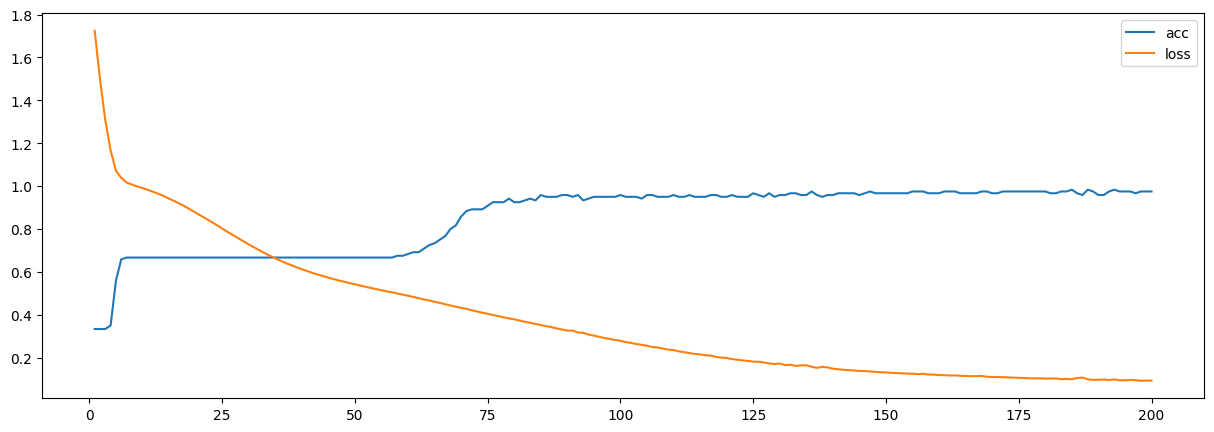

In [144]:
plt.figure(figsize=(15,5))
plt.plot(range(1,201),h.history['accuracy'],label='acc')
plt.plot(range(1,201),h.history['loss'],label='loss')
plt.legend()
plt.show()

In [145]:
# 모델 평가
model.evaluate(X_test,y_te_one_hot)

1/1 [==============================] - 1s 634ms/step - loss: 0.1045 - accuracy: 0.9667


[0.10449086129665375, 0.9666666388511658]

### 1. 회귀
- 손실함수 (loss) : MSE (평균 제곱 오차)
- 출력층 뉴런 갯수 : 1
- 출력층 활성화 함수 : linear => 기본값

### 2. 이진분류
- 손실함수 (loss) : binary_crossentropy
- 출력층 뉴런 갯수 : 1
- 출력층 활성화 함수 : sigmoid

### 3. 다중분류
- 손실함수 (loss) : categorical_crossentropy
- 출력층 뉴런 갯수 : 정답 갯수 (원핫인코딩 되어진 정답의 종류 만큼)
- 출력층 활성화 함수 : softmax